In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ransac parameters
ransac_iterations = 50  # number of iterations
ransac_threshold = 3    # threshold
ransac_ratio = 0.6     # ratio of inliers required to assert
                        # that a model fits well to data

# generate sparse input data
n_samples = 500               # number of input points
outliers_ratio = 0.4          # ratio of outliers

n_inputs = 1
n_outputs = 1

# generate samples
x = 30*np.random.random((n_samples,n_inputs) )

# generate line's slope (called here perfect fit)
perfect_fit = 0.5*np.random.normal(size=(n_inputs,n_outputs) )

# compute output
y = np.dot(x,perfect_fit)

In [97]:
x_noise = x + np.random.normal(size=x.shape)
y_noise = y + np.random.normal(size=y.shape)


n_outliers = int(outliers_ratio*n_samples)
indices = np.arange(x_noise.shape[0])
np.random.shuffle(indices)
outlier_indices = indices[:n_outliers]

x_noise[outlier_indices] = 30*np.random.random(size=(n_outliers,n_inputs))
y_noise[outlier_indices] = np.abs(30*np.random.normal(size=(n_outliers,n_outputs)))

In [115]:
def ransac_plot(n, x, y, m, c, final=False, x_in=(), y_in=(), points=()):
    
    line_width = 1.
    line_color = '#0080ff'
    title = 'iteration ' + str(n)

    if final:
        line_width = 3.
        line_color = '#ff0000'
        title = 'final solution'

    plt.figure("Ransac", figsize=(15., 15.))

    # grid for the plot
    grid = [min(x) - 10, max(x) + 10, min(y) - 20, max(y) + 20]
    plt.axis(grid)

    # put grid on the plot
    plt.grid(b=True, which='major', color='0.75', linestyle='--')

    # plot input points
    plt.plot(x, y, marker='o', label='Input points', color='#00cc00', linestyle='None', alpha=0.4)

    # draw the current model
    plt.plot(x, m*x + c, 'r', label='Line model', color=line_color, linewidth=line_width)

    # draw inliers
    if not final:
        plt.plot(x_in, y_in, marker='o', label='Inliers', linestyle='None', color='#ff0000', alpha=0.6)

    # draw points picked up for the modeling
    if not final:
        plt.plot(points[:,0], points[:,1], marker='o', label='Picked points', color='#0000cc', linestyle='None', alpha=0.6)

In [116]:
def find_line_model(points):
    # y = k*x + b
    k = (points[1,1] - points[0,1]) / (points[1,0] - points[0,0] + 1e-6)
    b = points[1,1] - k * points[1,0]

    return k, b

def find_intercept_point(k, b, p):
    

    return np.r_[x, y]


In [117]:
def out_checker(k,b,thresh):
    def f(p):
        x = (p[0] + k*p[1] - k*b)/(1 + k**2)
        y = (k*p[0] + (k**2)*p[1] - (k**2)*b)/(1 + k**2) + b
        dist = np.linalg.norm(p - (x,y))
        return dist < thresh
    return f

In [118]:
class RANSAC():
    def __init__(self, threshold=3, inl_ratio=0.6):
        self.tr = threshold
        self.inl_r = inl_ratio
        self.k = 0
        self.b = 0
        
    def fit(self, data, max_iter=100):
        ratio = 0
        idx = np.arange(len(data))
        for i in range(max_iter):
            np.random.shuffle(idx)
            
            train = data[idx[:2]]
            test = data[idx[2:]]
            
            k, b = find_line_model(train)
            n_inliers = sum(
                map(out_checker(k, b, self.tr), test)
            )
            if n_inliers/len(data) > ratio:
                ratio = n_inliers / len(data)
                self.k = k
                self.b = b
            if n_inliers > len(data) * self.inl_r:
                break

In [119]:
r = RANSAC()

In [120]:
r.fit(data)

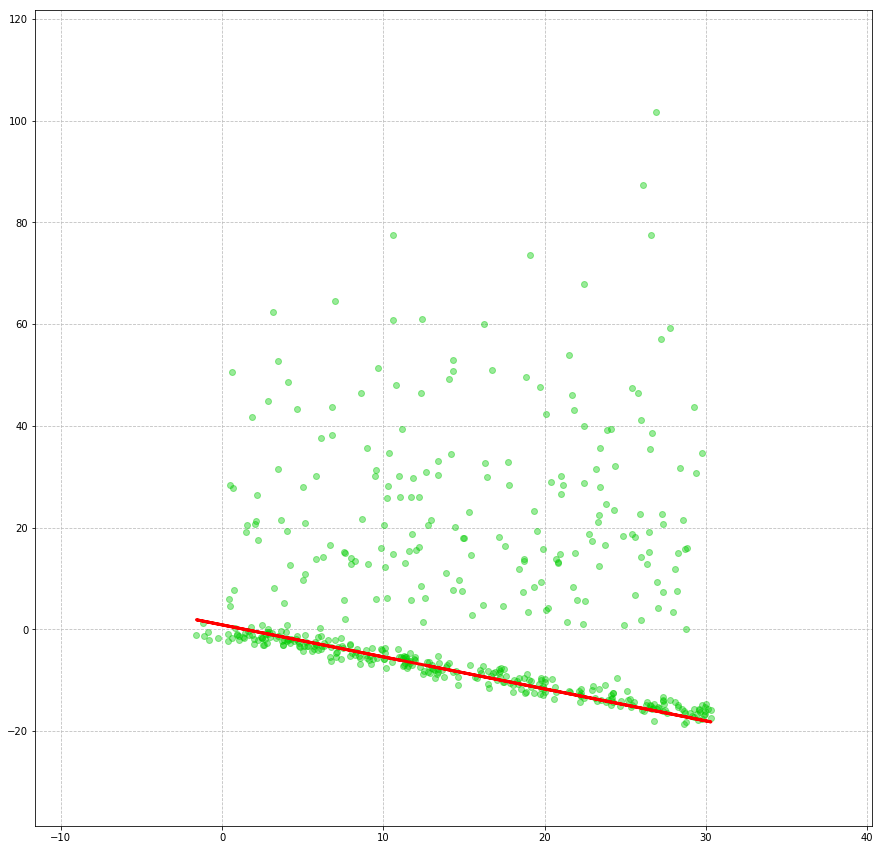

In [121]:
# data = np.c_[x_noise,y_noise]

# ratio = 0
# model_k = 0
# model_b = 0

# # perform RANSAC iterations
# idx = np.arange(data.shape[0])
# for it in range(ransac_iterations):

#     np.random.shuffle(idx)

#     cur_pt = data[idx[:2],:]
#     test_pt = data[idx[2:],:]

#     k, b = find_line_model(cur_pt)
#     n_inliers = sum(map(out_checker(k, b, ransac_threshold), test_pt))

#     if n_inliers/n_samples > ratio:
#         ratio = n_inliers/n_samples
#         model_k = k
#         model_b = b
        
#         if n_inliers > n_samples*ransac_ratio:
#             print('The model is found !')
#             break

# # plot the final model
ransac_plot(0, data[:,0],data[:,1], r.k, r.b, True)